In [1]:
import pandas as pd

df = pd.read_csv("Tweets.csv")

df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [5]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [12]:
df = df.drop(['tweet_id', 'airline_sentiment_confidence', 'negativereason_confidence', 'airline_sentiment_gold', 'negativereason_gold',  'retweet_count', 'tweet_coord', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'],axis = 1)
df

KeyError: ignored

In [13]:
df

,airline_sentiment,negativereason,airline,name,text
0,neutral,NaN,Virgin America,cairdin,@VirginAmerica What @dhepburn said.
1,positive,NaN,Virgin America,jnardino,@VirginAmerica plus you've added commercials t...
2,neutral,NaN,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I n...
3,negative,Bad Flight,Virgin America,jnardino,@VirginAmerica it's really aggressive to blast...
4,negative,Can't Tell,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing...
...,...,...,...,...,...
14635,positive,NaN,American,KristenReenders,@AmericanAir thank you we got on a different f...
14636,negative,Customer Service Issue,American,itsropes,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,NaN,American,sanyabun,@AmericanAir Please bring American Airlines to...
14638,negative,Customer Service Issue,American,SraJackson,"@AmericanAir you have my money, you change my ..."


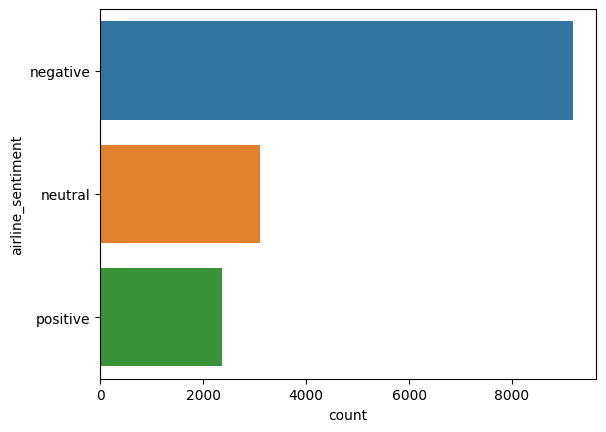

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(data = df, y =  "airline_sentiment", order = df.airline_sentiment.value_counts().index)
plt.show()

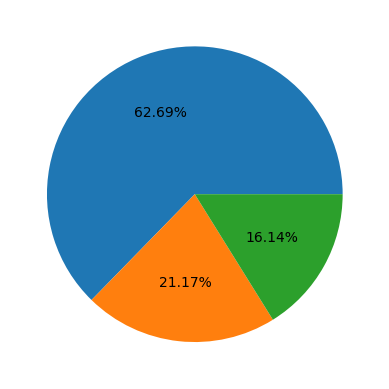

In [23]:
a1 = plt.pie(data = df, x = df.airline_sentiment.value_counts(), autopct = '%1.2f%%')
plt.show()

In [25]:
a2 = df.groupby(["airline", "airline_sentiment"])["airline_sentiment"].count().unstack()
a2

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


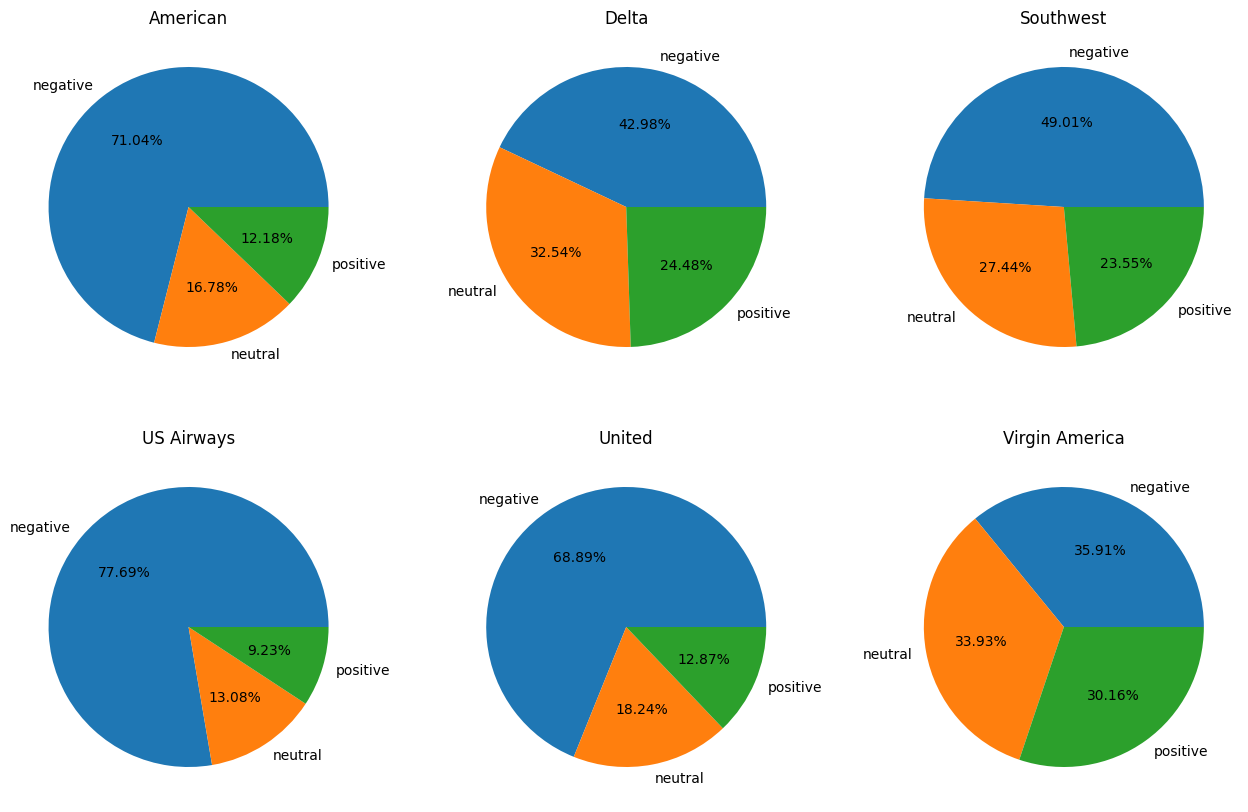

In [43]:
fig,axes = plt.subplots(2,3,figsize = (16,10))
axes = axes.flatten()
for value, ax in zip(range(0,6), axes):
    t = a2.iloc[value]
    ax.pie(x = t, labels = t.index, autopct = "%1.2f%%")
    ax.set_title(f"{a2.index[value]}")

plt.show()

In [34]:
datanegreasons = df[df.airline_sentiment == 'negative']

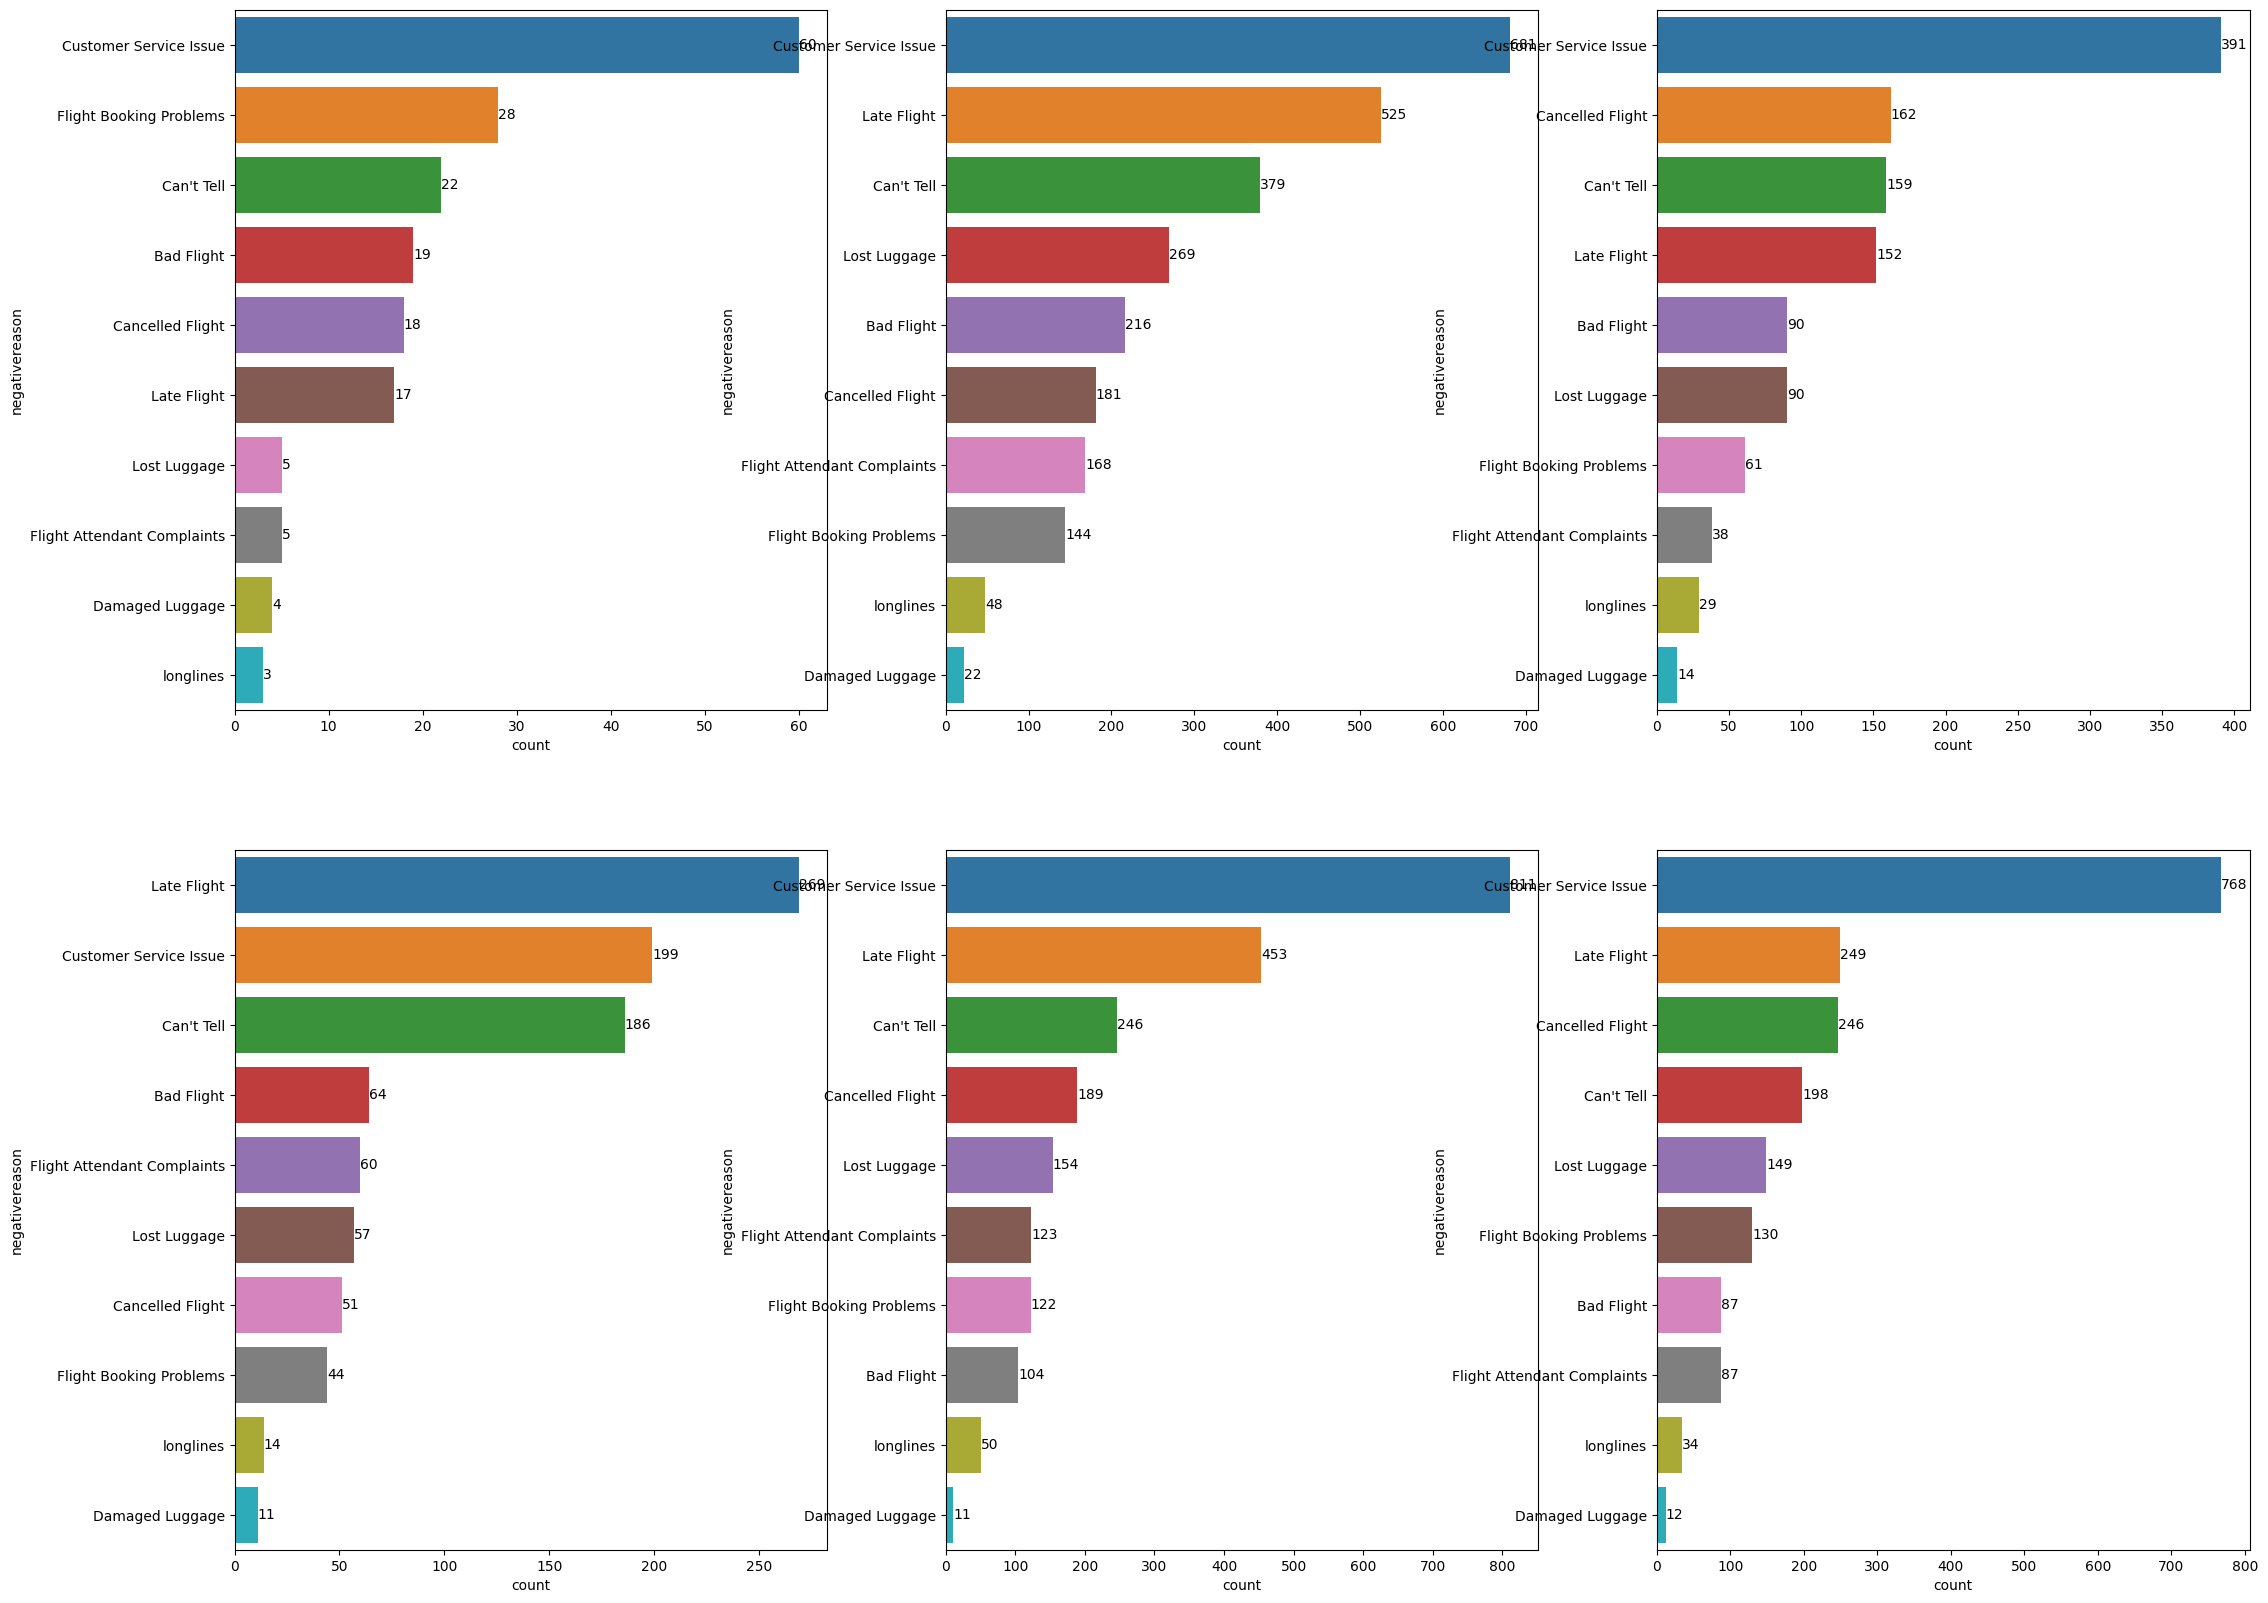

In [53]:
fig,axes = plt.subplots(2,3,figsize = (26,20))
axes = axes.flatten()
name = datanegreasons["airline"].unique()

for value, n in zip(name, axes):
    ax = sns.countplot(data = datanegreasons[datanegreasons.airline==value], y = 'negativereason', order = datanegreasons[datanegreasons.airline==value].negativereason.value_counts().index, ax = n)
    ax.bar_label(ax.containers[0])
plt.show()


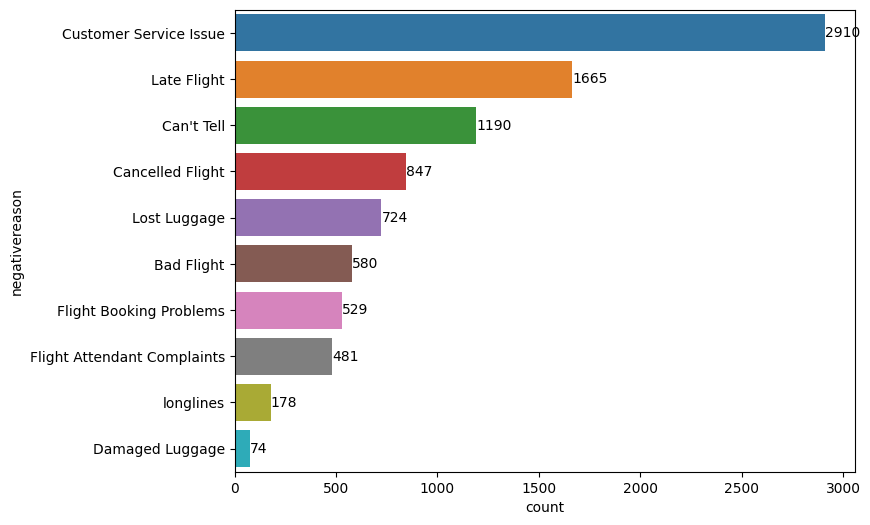

In [36]:
`plt.figure(figsize = (8,6))
axes = sns.countplot(data = datanegreasons, y = 'negativereason', order = datanegreasons.negativereason.value_counts().index)
axes.bar_label(axes.containers[0])
plt.show()